## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Read Data

In [2]:
inputURL = 'https://gist.githubusercontent.com/prmishra/0e42b7444729751f354f668687ae0f4c/raw/072e4757d4041f789f00b0943b6ffed607342f16/data.csv'

df = pd.read_csv(inputURL)
print(df.shape)
df.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## Data Visualization before kMeans

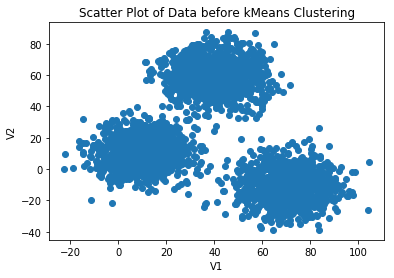

In [3]:
plt.scatter(df['V1'], df['V2'])
plt.title('Scatter Plot of Data before kMeans Clustering')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

The data is clearly divided into 3 different clusters. Hence, in the KMeans algorithm of sklearn, the `n_clusters` will be 3.

## kMeans via Sklearn

In [4]:
Kmean = KMeans(n_clusters = 3)
Kmean.fit(df)
Kmean.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

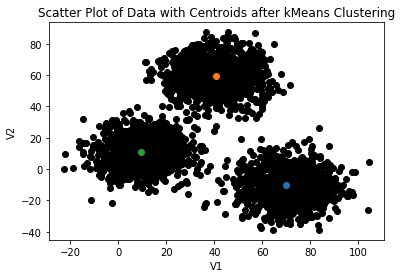

In [5]:
plt.scatter(df['V1'], df['V2'], color = 'k')
plt.title('Scatter Plot of Data with Centroids after kMeans Clustering')
plt.xlabel('V1')
plt.ylabel('V2')
plt.scatter(69.92418447, -10.11964119)
plt.scatter(40.68362784,  59.71589274)
plt.scatter(9.4780459 ,  10.686052)
plt.show()

The above are the centroids for the three respective clusters and we need to attain these coordinates using native KMeans algorithm by assigning custom centroids and updating them till they converge.

## Native kMeans Function

### Step 1

#### Allocation of three points in random which will be used to find cluster centroids.

In [6]:
nClusters = 3
centroids = dict()

for i in range(nClusters):
    centroids[i+1] = [np.random.randint(0, 80), np.random.randint(0, 80)]
    
centroids

{1: [8, 13], 2: [2, 29], 3: [17, 11]}

#### Visualization of Random Centroids and Given Data Points (`df`)

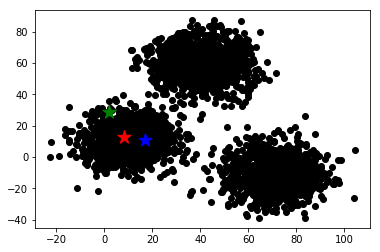

In [7]:
plt.scatter(df['V1'], df['V2'], color = 'k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i], s = 200, marker = '*')
plt.show()

As seen above, the centroids are custom located and will be updated.

### Step 2

#### Calculating distance and assigning `clusterNumber` of the given data points in `df`

In [8]:
def clusterNumberCalculation(df, centroids):
    
    # Distance is calculated from the three different points
    df['distanceFromCentroid1'] = np.linalg.norm(df[['V1', 'V2']].sub(centroids[1]), axis=1)
    df['distanceFromCentroid2'] = np.linalg.norm(df[['V1', 'V2']].sub(centroids[2]), axis=1)
    df['distanceFromCentroid3'] = np.linalg.norm(df[['V1', 'V2']].sub(centroids[3]), axis=1)
    
    # Cluster number is assigned based on the minimum distance that was calculated
    df['clusterNumber'] = df[['distanceFromCentroid1', 'distanceFromCentroid2', 'distanceFromCentroid3']].idxmin(axis=1, skipna = True)
    df['clusterNumber'] = df['clusterNumber'].map({'distanceFromCentroid1': 1, 'distanceFromCentroid2': 2, 'distanceFromCentroid3': 3})
    
    # Cluster colors are assigned to help visualize in scatter plot
    df['clusterColor'] = df['clusterNumber'].map({1.0: 'r', 2.0: 'g', 3.0: 'b'})
    
    return df

df = clusterNumberCalculation(df, centroids)
df.head()

,V1,V2,distanceFromCentroid1,distanceFromCentroid2,distanceFromCentroid3,clusterNumber,clusterColor
0,2.072345,-3.241693,17.289583,32.241774,20.631546,1,r
1,17.936710,15.784810,10.319563,20.703139,4.875637,3,b
2,1.083576,7.319176,8.950345,21.700183,16.336493,1,r
3,11.120670,14.406780,3.423100,17.208971,6.795048,1,r
4,23.711550,2.557729,18.865148,34.213814,10.785029,3,b


#### Visualization of Random Centroids and Clusters of Given Data Points (`df`)

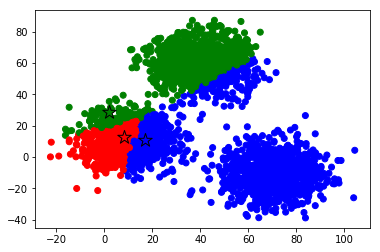

In [9]:
colmap = {1: 'r', 2: 'g', 3: 'b'}
plt.scatter(df['V1'], df['V2'], color = df['clusterColor'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i], edgecolor = 'k', s = 200, marker = '*')
plt.show()

### Step 3

#### Updating the centroids by calcuting the averages over the three clusters

In [10]:
df['V1_V2'] = df[['V1', 'V2']].values.tolist()
updatedCentroids = dict(df.groupby('clusterNumber')['V1_V2'].apply(lambda x: np.mean(x.tolist(), axis=0)))

#### Visualization of Updated Centroids and Updated Clusters of Given Data Points (`df`)

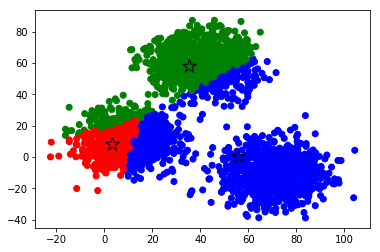

In [11]:
colmap = {1: 'r', 2: 'g', 3: 'b'}
plt.scatter(df['V1'], df['V2'], color = df['clusterColor'])
for i in updatedCentroids.keys():
    plt.scatter(*updatedCentroids[i], color = colmap[i], edgecolor = 'k', s = 200, marker = '*')
plt.show()

### Step 4

#### Repeat Step 2 until convergence

In [12]:
while True:
    oldClusterNumbers = df['clusterNumber'].copy(deep=True)
    updatedCentroids = dict(df.groupby('clusterNumber')['V1_V2'].apply(lambda x: np.mean(x.tolist(), axis=0)))
    df = clusterNumberCalculation(df, updatedCentroids)
    if oldClusterNumbers.equals(df['clusterNumber']):
        break

#### Visualization of Updated Centroids and Updated Clusters of Given Data Points (`df`)

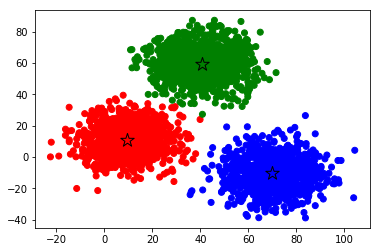

In [13]:
colmap = {1: 'r', 2: 'g', 3: 'b'}
plt.scatter(df['V1'], df['V2'], color = df['clusterColor'])
for i in updatedCentroids.keys():
    plt.scatter(*updatedCentroids[i], color = colmap[i], edgecolor = 'k', s = 200, marker = '*')
plt.show()

### Sklearn vs Native kMeans Function Comparison

In [14]:
updatedCentroids, Kmean.cluster_centers_

({1: array([ 9.4780459, 10.686052 ]),
  2: array([40.68362784, 59.71589274]),
  3: array([ 69.92418447, -10.11964119])},
 array([[ 69.92418447, -10.11964119],
        [ 40.68362784,  59.71589274],
        [  9.4780459 ,  10.686052  ]]))

The `updatedCentroids` generated from the kMeans function are similar to the ones calculated by Sklearn. Note that the dictionaries are not arranged in order for direct comparison.